In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
use_cuda = torch.cuda.is_available()
device = 'cuda' if use_cuda else 'cpu'

#Do not forget to run pip install facenet-pytorch
from facenet_pytorch import MTCNN
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    bounding_boxes=bounding_boxes[probs>0.9]
    return bounding_boxes

print(use_cuda)

False


In [10]:
# timm 0.9.7. でないと動かない
from hsemotion.facial_emotions import HSEmotionRecognizer
model_name='enet_b0_8_best_afew'
fer=HSEmotionRecognizer(model_name=model_name,device='cpu')

/Users/ishidakazuma/.hsemotion/enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [5]:
from hsemotion.facial_emotions import HSEmotionRecognizer
import timm
model_name='enet_b0_8_best_afew'
#model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name,device=device)

/Users/ishidakazuma/.hsemotion/enet_b0_8_best_afew.pt Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


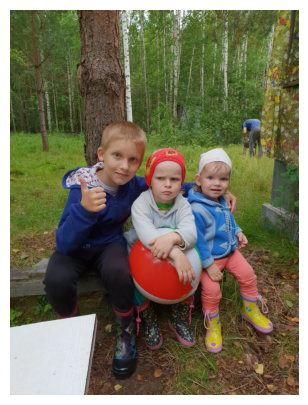

In [6]:
fpath='file_path'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Happiness [-2.4796233   2.2817333  -0.68236643 -1.5044554   2.7863975   0.36100155
 -1.2032965  -0.28963694]
Anger [ 5.4709272   0.02302402  1.913288    1.6802025  -2.8151693   1.1558328
  2.20422    -1.3341391 ]
Fear [-2.6938758  -0.9670619  -0.03839339  2.170746    2.0669556   0.03462251
 -0.04642842  1.843661  ]


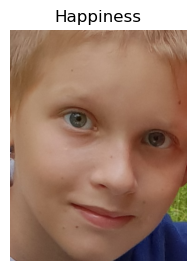

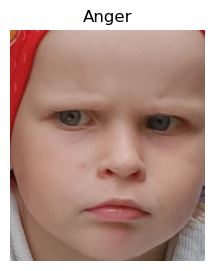

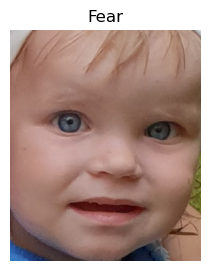

In [7]:
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [8]:
features=fer.extract_features(face_img)
print(features.shape,features)

(1, 1280) [[-0.02051376  0.05693436 -0.13048026 ... -0.15725452  0.07156676
  -0.14101787]]


['Happiness', 'Anger', 'Fear'] [[2.8581431e-03 3.3412880e-01 1.7243376e-02 7.5786859e-03 5.5346131e-01
  4.8949845e-02 1.0241998e-02 2.5537757e-02]
 [9.0232509e-01 3.8848044e-03 2.5721719e-02 2.0373853e-02 2.2738293e-04
  1.2059857e-02 3.4407336e-02 9.9991076e-04]
 [2.5627373e-03 1.4409536e-02 3.6472488e-02 3.3218700e-01 2.9943827e-01
  3.9235223e-02 3.6180619e-02 2.3951420e-01]]


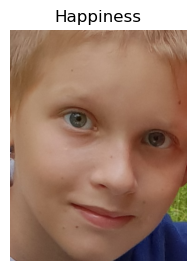

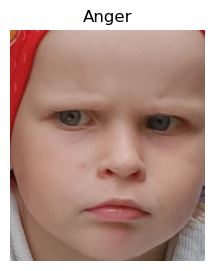

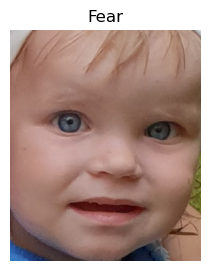

In [9]:
face_img_list=[]
for bbox in bounding_boxes:
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

In [8]:
features=fer.extract_multi_features(face_img_list)
print(features.shape,features)

(3, 1280) [[-0.19220257  0.02514308 -0.09053314 ... -0.07387376  0.17337616
   0.07425296]
 [ 0.08527321 -0.0995563  -0.05925399 ...  0.05283366 -0.19729096
   0.00884614]
 [-0.02051418  0.05693425 -0.13048033 ... -0.15725467  0.07156633
  -0.14101806]]
